# Struttura dei test

Per la fase di test sono stati generati dei dataset tramite la funzione
`make_classification` del modulo `sklearn`. Ogni dataset ha un totale di 100
punti, 80 dei quali sono stati utilizzati per il training dei modelli. Ne segue
che l'algoritmo genetico è stato eseguito su un totale di 20 punti per dataset.
I parametri che variano da un dataset all'altro sono:

- **Numero di feature di ogni punto**: 2, 4, 8, 16, 32.
- **Numero di classi possibili per ogni punto**: 2, 4.
- **Seme di casualità per il generatore**: 0, 1, 2, 3, 4.

Per i test effettuati sono stati presi in considerazione tre modelli differenti
del modulo `sklearn`: **RandomForestClassifier**, **SVC** e
**MLPClassifier**. Su ognuno dei dataset è stato eseguito l'algoritmo genetico
usando tutti e tre i modelli e, per ognuno di essi, popolazioni sintetiche
da 1000, 2000 e 4000 individui.


In [1]:
import pandas as pd

df = pd.read_csv("../datasets/test.csv")
df

,dataset_id,simulation_id,samples,features,classes,clusters,population_size,point,class,target,model,min_fitness,mean_fitness,fitness_std,max_fitness,accuracy
0,0,0,10,2,2,1,1000,0,1,0,SVC,-0.855264,-0.696396,0.092766,-0.547943,1.0
1,0,0,10,2,2,1,1000,0,1,1,SVC,-0.197379,-0.104045,0.057211,-0.000054,1.0
2,0,0,10,2,2,1,1000,1,0,0,SVC,-0.143339,-0.073661,0.039783,-0.000221,1.0
3,0,0,10,2,2,1,1000,1,0,1,SVC,-0.572780,-0.484936,0.047278,-0.416159,1.0
4,0,0,10,2,2,1,1000,2,1,0,SVC,-1.160755,-1.096355,0.035346,-1.031373,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,4,10,2,2,2,4000,7,0,1,MLPClassifier,-0.685313,-0.562300,0.068521,-0.445267,1.0
1196,1,4,10,2,2,2,4000,8,0,0,MLPClassifier,-0.178795,-0.093622,0.051011,-0.000323,1.0
1197,1,4,10,2,2,2,4000,8,0,1,MLPClassifier,-0.722029,-0.567538,0.083668,-0.448194,1.0
1198,1,4,10,2,2,2,4000,9,0,0,MLPClassifier,-0.127930,-0.065308,0.035431,-0.000132,1.0


## Dataset dei risultati

Ogni riga del dataset contiene quindi:

- **dataset_ID**: ID univoco per ogni dataset analizzato.
- **simulation_ID**: identifica una singola simulazione con determinati
  parametri. Dato che ogni simulazione è ripetuta 10 volte, ognuna di esse ha
  un identificatore da 0 a 9.
- **samples**: numero di punti, per ciascun dataset, su cui è stato eseguito
  l'algoritmo genetico.
- **features**: numero di feature dei punti nel dataset.
- **classes**: numero di classi possibili per un determinato dataset.
- **clusters**: numero di cluster per classe.
- **population_size**: numero di individui sintetici usati dall'algoritmo
  genetico.
- **point**: ogni punto del dataset viene semplicemente enumerato da $0$ a
  $N-1$, dove $N$ è il numero totale di punti del dataset.
- **class**: classe del punto.
- **target**: classe target dell'algoritmo genetico.
- **model**: il modello di ML utilizzato per la classificazione.
- **min/mean/max_fitness**: valore minimo, medio e massimo di fitness estratti
  dalla hall of fame prodotta ad ogni esecuzione dell'algoritmo genetico.
- **fitness_std**: deviazione standard dei valori di fitness della popolazione
  sintetica finale.
- **accuracy**: calcolata come numero di individui nella hall of fame
  classificati nella classe target diviso numero di individui totali presenti
  nella hall of fame.

Possiamo quindi vedere ogni riga come una singola esecuzione dell'algoritmo
genetico su uno specifico punto con una specifica classe target.

### Pulizia dataset

Il dataset grezzo è abbastanza scomodo da analizzare. Di seguito qualche
operazione per raffinare un po' le informazioni e ridurre le ridondanze.

#### Conversione fitness-distanza

Dato che i valori di fitness non sono altro che la distanza di ogni punto
sintetico dal punto preso in esame, moltiplicata per un peso di $-1$, possiamo
convertire le tre colonne di fitness in valori di distanza rimoltiplicandole
per $-1$ di modo da avere valori meglio interpretabili.


In [2]:
df[["min_fitness", "mean_fitness", "max_fitness"]] *= -1.0
df = df.rename(
    columns={
        "min_fitness": "max_distance",
        "mean_fitness": "mean_distance",
        "fitness_std": "distance_std",
        "max_fitness": "min_distance",
    }
)
df

,dataset_id,simulation_id,samples,features,classes,clusters,population_size,point,class,target,model,max_distance,mean_distance,distance_std,min_distance,accuracy
0,0,0,10,2,2,1,1000,0,1,0,SVC,0.855264,0.696396,0.092766,0.547943,1.0
1,0,0,10,2,2,1,1000,0,1,1,SVC,0.197379,0.104045,0.057211,0.000054,1.0
2,0,0,10,2,2,1,1000,1,0,0,SVC,0.143339,0.073661,0.039783,0.000221,1.0
3,0,0,10,2,2,1,1000,1,0,1,SVC,0.572780,0.484936,0.047278,0.416159,1.0
4,0,0,10,2,2,1,1000,2,1,0,SVC,1.160755,1.096355,0.035346,1.031373,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,4,10,2,2,2,4000,7,0,1,MLPClassifier,0.685313,0.562300,0.068521,0.445267,1.0
1196,1,4,10,2,2,2,4000,8,0,0,MLPClassifier,0.178795,0.093622,0.051011,0.000323,1.0
1197,1,4,10,2,2,2,4000,8,0,1,MLPClassifier,0.722029,0.567538,0.083668,0.448194,1.0
1198,1,4,10,2,2,2,4000,9,0,0,MLPClassifier,0.127930,0.065308,0.035431,0.000132,1.0


#### Aggregazione simulazioni

Procediamo con l'accorpare i risultati di diverse simulazioni effettuate con
gli stessi parametri. Nello specifico vogliamo rimuovere la colonna
`simulation_ID`, applicando le seguenti operazioni di aggregazione sulle
colonne riguardanti i valori di distanza e precisione:

- _min_distance_: viene preso il minimo tra tutti i valori.
- _mean_distance_: viene calcolata la media tra tutti i valori.
- _max_distance_: viene preso il massimo tra tutti i valori.
- _distance_std_: viene calcolata la media delle deviazioni standard.
- _accuracy_: viene calcolata la media delle precisioni.


In [3]:
df = (
    df.groupby(
        [
            "dataset_id",
            "samples",
            "features",
            "classes",
            "clusters",
            "population_size",
            "point",
            "class",
            "target",
            "model",
        ]
    )
    .agg(
        {
            "min_distance": "min",
            "mean_distance": "mean",
            "distance_std": "mean",
            "max_distance": "max",
            "accuracy": "mean",
        }
    )
    .reset_index()
    .sort_values(by=["dataset_id", "population_size", "model"])
)

df

,dataset_id,samples,features,classes,clusters,population_size,point,class,target,model,min_distance,mean_distance,distance_std,max_distance,accuracy
0,0,10,2,2,1,1000,0,1,0,MLPClassifier,0.436679,0.610789,0.100287,0.796946,1.0
2,0,10,2,2,1,1000,0,1,1,MLPClassifier,0.000054,0.099295,0.054942,0.201823,1.0
4,0,10,2,2,1,1000,1,0,0,MLPClassifier,0.000221,0.077683,0.041085,0.154410,1.0
6,0,10,2,2,1,1000,1,0,1,MLPClassifier,0.404858,0.498397,0.048508,0.592737,1.0
8,0,10,2,2,1,1000,2,1,0,MLPClassifier,1.007849,1.089076,0.036584,1.169256,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,1,10,2,2,2,4000,7,0,1,SVC,0.411283,0.519239,0.062797,0.652891,1.0
233,1,10,2,2,2,4000,8,0,0,SVC,0.000323,0.096761,0.052044,0.197645,1.0
235,1,10,2,2,2,4000,8,0,1,SVC,0.439107,0.561219,0.074872,0.697808,1.0
237,1,10,2,2,2,4000,9,0,0,SVC,0.000009,0.067265,0.036705,0.135118,1.0


#### Riduzione ridondanze

Come ultima il dataset è stato diviso in più parti per ridurre la ridondanza.
Abbiamo infatti che le colonne da `dataset_id` a `clusters` costituiscono solo
informazioni riguardanti il dataset in input. Andiamo quindi a rimuovere tali
colonne dal dataframe per creare un nuovo dataframe contenente le informazioni
relative ai dataset in input. L'unica colonna che rimane è `dataset_id`, la
quale verrà usata come chiave.


In [4]:
dataset_df = df[
    ["dataset_id", "samples", "features", "classes", "clusters"]
].drop_duplicates()

dataset_df

,dataset_id,samples,features,classes,clusters
0,0,10,2,2,1
120,1,10,2,2,2


Procediamo con il rimuovere le colonne che non sono più necessarie.


In [5]:
df.drop(columns=["samples", "features", "classes", "clusters"], inplace=True)
df

,dataset_id,population_size,point,class,target,model,min_distance,mean_distance,distance_std,max_distance,accuracy
0,0,1000,0,1,0,MLPClassifier,0.436679,0.610789,0.100287,0.796946,1.0
2,0,1000,0,1,1,MLPClassifier,0.000054,0.099295,0.054942,0.201823,1.0
4,0,1000,1,0,0,MLPClassifier,0.000221,0.077683,0.041085,0.154410,1.0
6,0,1000,1,0,1,MLPClassifier,0.404858,0.498397,0.048508,0.592737,1.0
8,0,1000,2,1,0,MLPClassifier,1.007849,1.089076,0.036584,1.169256,1.0
...,...,...,...,...,...,...,...,...,...,...,...
231,1,4000,7,0,1,SVC,0.411283,0.519239,0.062797,0.652891,1.0
233,1,4000,8,0,0,SVC,0.000323,0.096761,0.052044,0.197645,1.0
235,1,4000,8,0,1,SVC,0.439107,0.561219,0.074872,0.697808,1.0
237,1,4000,9,0,0,SVC,0.000009,0.067265,0.036705,0.135118,1.0


# Precisione

Per quanto riguarda la precisione possiamo fare una veloce analisi andando
ad eliminare tutti i duplicati della colonna `accuracy` e vedere cosa rimane.


In [6]:
df["accuracy"].drop_duplicates()

0    1.0
Name: accuracy, dtype: float64

Questa breve analisi ci dice subito che i valori di `accuracy` sono tutti $1.0$
per qualsiasi simulazione effettuata. Si potrebbe pensare di aggregarli in vari
modi ma otterremo sempre una colonna di $1.0$. Abbiamo quindi la precisione
massima possibile per ogni simulazione effettuata.


# Fitness

Per i valori di fitness potrebbero invece verificarsi differenze sostanziali
tra simulazioni diverse. Ad esempio cambiando il modello usato per la
classificazione e il numero di punti sintetici usati.

Iniziamo ad esempio con il vedere il valore di fitness medio dei punti nel caso
in cui la classe del punto e la classe target sono uguali.


In [7]:
fitness_df = (
    df.groupby(["dataset_id", "population_size", "model"])[
        ["min_distance", "mean_distance", "max_distance"]
    ]
    .mean()
    .reset_index()
)

fitness_df

,dataset_id,population_size,model,min_distance,mean_distance,max_distance
0,0,1000,MLPClassifier,0.366022,0.501321,0.628945
1,0,1000,SVC,0.383509,0.507425,0.628488
2,0,2000,MLPClassifier,0.359796,0.493447,0.625638
3,0,2000,SVC,0.383310,0.499409,0.615887
4,0,4000,MLPClassifier,0.358574,0.484400,0.609193
5,0,4000,SVC,0.382677,0.492923,0.605839
6,1,1000,MLPClassifier,0.396255,0.570488,0.732753
7,1,1000,SVC,0.392060,0.553057,0.705842
8,1,2000,MLPClassifier,0.396524,0.564513,0.716603
9,1,2000,SVC,0.390810,0.542554,0.688465


Nei grafici sottostanti possiamo vedere, per ognuno dei tre modelli, come
cambia l'andamento dei valori di fitness al variare della dimensione della
popolazione.


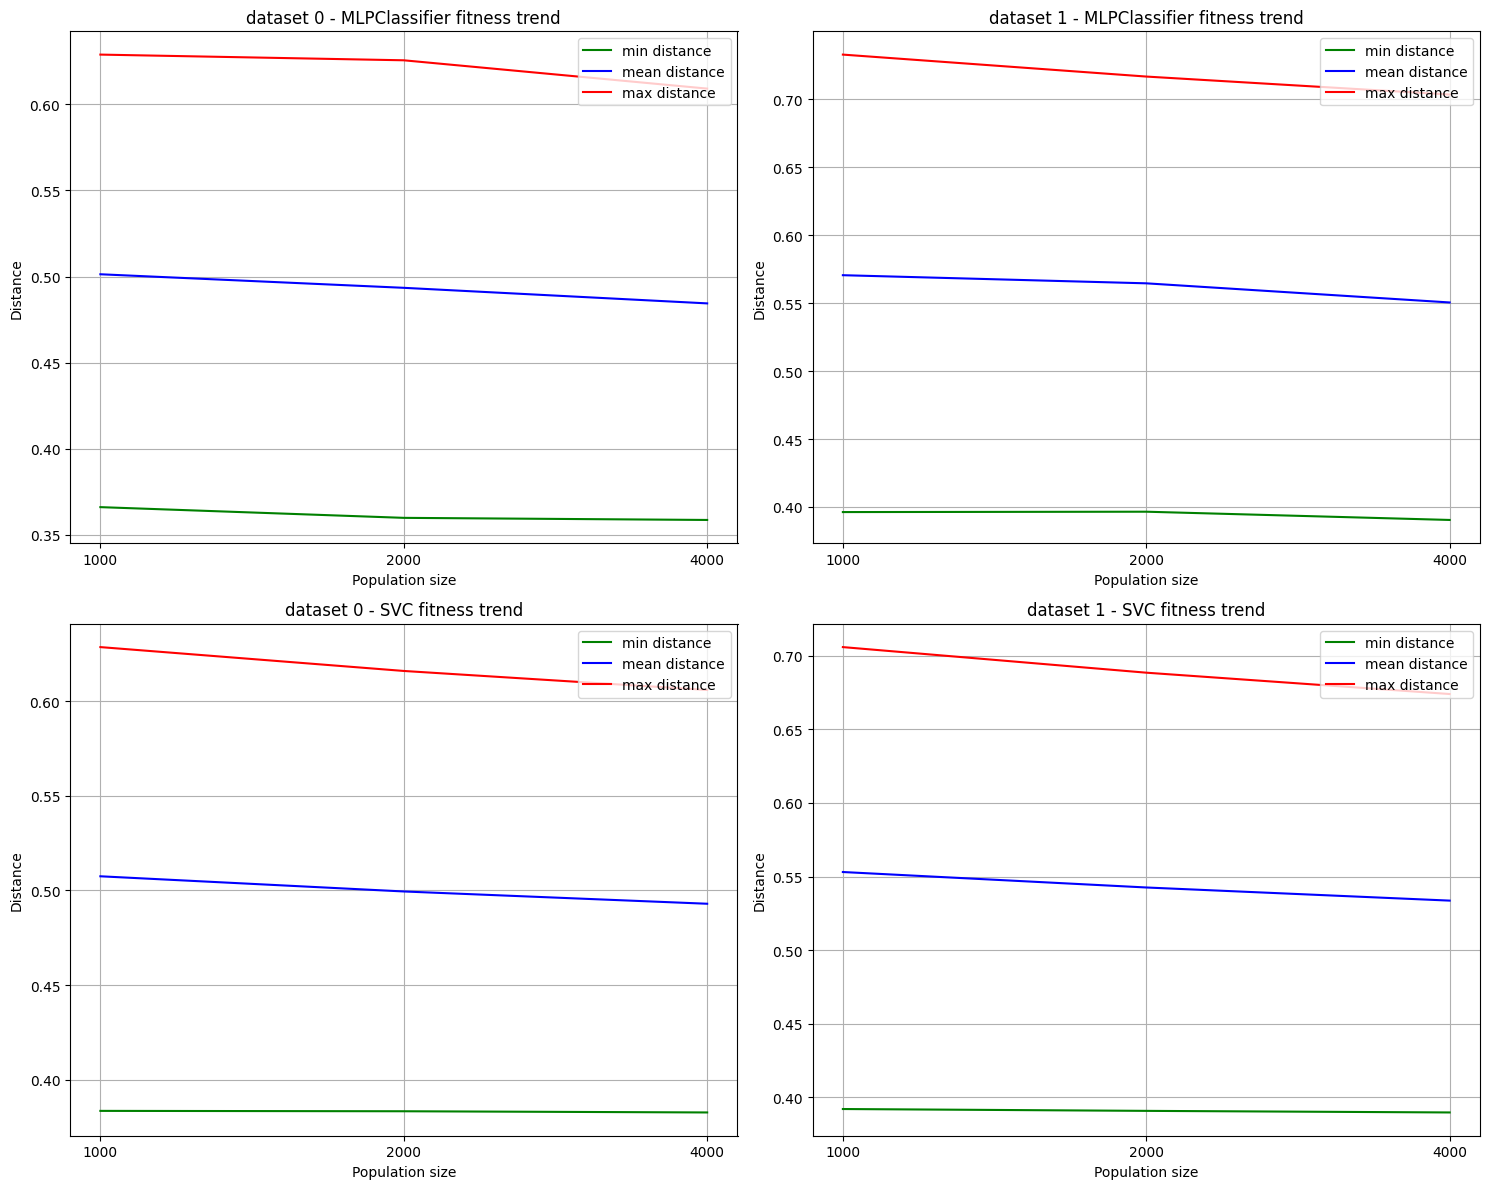

In [8]:
import matplotlib.pyplot as plt


def plot_fitness_trend(df):
    models = df["model"].drop_duplicates().tolist()
    datasets = df["dataset_id"].drop_duplicates().tolist()
    fig, axes = plt.subplots(len(models), len(datasets), figsize=(15, 12))
    for i, model in enumerate(models):
        for j, dataset in enumerate(datasets):
            sub_df = df[(df["model"] == model) & (df["dataset_id"] == dataset)]
            axes[i][j].set_title(f"dataset {dataset} - {model} fitness trend")
            axes[i][j].set_xlabel("Population size")
            axes[i][j].set_ylabel("Distance")
            axes[i][j].set_xscale("log", base=2)
            axes[i][j].set_xticks(
                sub_df["population_size"].values,
                labels=sub_df["population_size"].values,
            )

            axes[i][j].plot(
                sub_df["population_size"].values,
                sub_df["min_distance"].values,
                c="g",
                label="min distance",
            )

            axes[i][j].plot(
                sub_df["population_size"].values,
                sub_df["mean_distance"].values,
                c="b",
                label="mean distance",
            )

            axes[i][j].plot(
                sub_df["population_size"].values,
                sub_df["max_distance"].values,
                c="r",
                label="max distance",
            )

            axes[i][j].grid()
            axes[i][j].legend()

    plt.tight_layout()
    plt.show()


plot_fitness_trend(fitness_df)